In [83]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\1-Data Science\\6 - Machine Learning\\Random Forest\\Data\\credit.csv')

In [14]:
df[df['employment_duration']=='1 - 4 years']

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
12,1 - 200 DM,12,good,furniture/appliances,1567,< 100 DM,1 - 4 years,1,1,22,none,own,1,skilled,1,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,> 200 DM,21,good,car,2923,100 - 500 DM,1 - 4 years,1,1,28,bank,own,1,management,1,yes,no
983,< 0 DM,36,good,car,8229,< 100 DM,1 - 4 years,2,2,26,none,own,1,skilled,2,no,yes
985,< 0 DM,15,critical,furniture/appliances,1433,< 100 DM,1 - 4 years,4,3,25,none,rent,2,skilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no


In [17]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [29]:
df['employment_duration'] = df['employment_duration'].replace({"1 - 4 years":'low',"> 7 years":'high','4 - 7 years':'medium'})
df['checking_balance'] = df['checking_balance'].replace({'1 - 200 DM':'high','< 0 DM':'low'})
df['savings_balance'] = df['savings_balance'].replace({'< 100 DM':'low','100 - 500 DM':'high'})


In [30]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,low,6,critical,furniture/appliances,1169,unknown,high,4,4,67,none,own,2,skilled,1,yes,no
1,high,48,good,furniture/appliances,5951,low,low,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,low,medium,2,3,49,none,own,1,unskilled,2,no,no
3,low,42,good,furniture/appliances,7882,low,medium,2,4,45,none,other,1,skilled,2,no,no
4,low,24,poor,car,4870,low,low,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,low,medium,3,4,31,none,own,1,unskilled,1,no,no
996,low,30,good,car,3857,low,low,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,low,high,4,4,38,none,own,1,skilled,1,no,no
998,low,45,good,furniture/appliances,1845,low,low,4,4,23,none,other,1,skilled,1,yes,yes


In [4]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [8]:
df['employment_duration'].head(11)

0       > 7 years
1     1 - 4 years
2     4 - 7 years
3     4 - 7 years
4     1 - 4 years
5     1 - 4 years
6       > 7 years
7     1 - 4 years
8     4 - 7 years
9      unemployed
10       < 1 year
Name: employment_duration, dtype: object

In [9]:
df['employment_duration'].replace({''})

0          < 0 DM
1      1 - 200 DM
2         unknown
3          < 0 DM
4          < 0 DM
          ...    
995       unknown
996        < 0 DM
997       unknown
998        < 0 DM
999    1 - 200 DM
Name: checking_balance, Length: 1000, dtype: object

In [32]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,low,6,critical,furniture/appliances,1169,unknown,high,4,4,67,none,own,2,skilled,1,yes,no
1,high,48,good,furniture/appliances,5951,low,low,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,low,medium,2,3,49,none,own,1,unskilled,2,no,no
3,low,42,good,furniture/appliances,7882,low,medium,2,4,45,none,other,1,skilled,2,no,no
4,low,24,poor,car,4870,low,low,3,4,53,none,other,2,skilled,2,no,yes


In [62]:
enc = LabelEncoder()

In [63]:
df['checking_balance'] = enc.fit_transform(df['checking_balance'])
df['credit_history'] = enc.fit_transform(df['credit_history'])


In [64]:
"""
Encoding all the columns where label encoding is required 
"""

l = ['purpose','savings_balance','employment_duration','other_credit','housing','job','phone']

for i in l:
    df[i] = enc.fit_transform(df[i])


In [65]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,2,6,0,4,1169,4,1,4,4,67,1,1,2,1,1,1,no
1,1,48,1,4,5951,3,2,2,2,22,1,1,1,1,1,0,yes
2,3,12,0,3,2096,3,3,2,3,49,1,1,1,3,2,0,no
3,2,42,1,4,7882,3,3,2,4,45,1,0,1,1,2,0,no
4,2,24,3,1,4870,3,2,3,4,53,1,0,2,1,2,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,1,4,1736,3,3,3,4,31,1,1,1,3,1,0,no
996,2,30,1,1,3857,3,2,4,4,40,1,1,1,0,1,1,no
997,3,12,1,4,804,3,1,4,4,38,1,1,1,1,1,0,no
998,2,45,1,4,1845,3,2,4,4,23,1,0,1,1,1,1,yes


In [74]:
input = df.drop('default', axis='columns')
# target = enc.fit_transform(df['default'])
target = df['default']

In [75]:
X_train, X_test , y_train, y_test = train_test_split(input, target, test_size=0.2)

In [76]:
model = RandomForestClassifier(n_estimators = 21)

In [77]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=21)

In [78]:
pred = model.predict(X_test)
pred

array(['yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no

In [79]:
model.score(X_test, y_test)

0.785

In [82]:
cm = confusion_matrix(pred, y_test)
cm

array([[134,  31],
       [ 12,  23]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

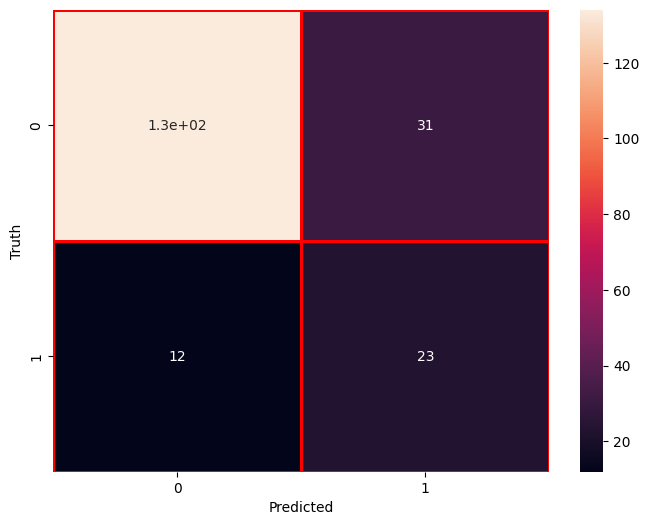

In [89]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, linecolor='r', linewidths=2)
plt.xlabel('Predicted')
plt.ylabel('Truth')